## Import the needed libraries

In [1]:
from visualization_tools import *
from automaton import *
from scenario_reader import *
from gui import *

from IPython.display import HTML

%reload_ext autoreload
%autoreload 2

In [2]:
print(tk.TkVersion)

8.6


## Task 1/5: Setting up the modeling environment

### 1. Basic visualization.

In [3]:
basic_scenario = {
    "width": 6,
    "height": 6,
    "cell_size": 1,
    "r_max":5,
    "use_speed" : False,
    "speed": 1.0,
    "follow" : False,
    "pedestrian_coordinates": [{"x":1, "y":2}, {"x":2,"y":5}],
    "obstacle_coordinates":[{"x":3, "y":2},{"x":3, "y":3},{"x":3, "y":4}],
    "target_coordinates":[{"x":5, "y":4}],
    "block_coordinates": [],
    "pedestrian_for_density": [],
    "use_dijkstra": True, 
    "use_utility":False
}

In [4]:
scenario = Scenario(basic_scenario)
set_scenario(scenario)
scenario.states

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 3., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [5]:
print(scenario.ped_coordinates)

[{'x': 1, 'y': 2}, {'x': 2, 'y': 5}]


In [6]:
scenario_gui = MainGUI(scenario)
scenario_gui.start_gui()

-------------------
Pedestrian position: 
(1, 2)
all neighbors
[(0, 1), (0, 2), (0, 3), (1, 1), (1, 3), (2, 1), (2, 2), (2, 3)]
obstacles: 
[(3, 2), (3, 3), (3, 4)]
targets: 
[(5, 4)]
neighbors without obs and pedes: 
[(0, 1), (0, 2), (0, 3), (1, 1), (1, 3), (2, 1), (2, 2), (2, 3)]
next_pos: 
(2, 3)
-------------------
Pedestrian position: 
(2, 5)
all neighbors
[(1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 5), (3, 6)]
obstacles: 
[(3, 2), (3, 3), (3, 4)]
targets: 
[(5, 4)]
neighbors without obs and pedes: 
[(1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 5), (3, 6)]
next_pos: 
(3, 5)
-------------------
Pedestrian position: 
(2, 3)
all neighbors
[(1, 2), (1, 3), (1, 4), (2, 2), (2, 4), (3, 2), (3, 3), (3, 4)]
obstacles: 
[(3, 2), (3, 3), (3, 4)]
targets: 
[(5, 4)]
neighbors without obs and pedes: 
[(1, 2), (1, 3), (1, 4), (2, 2), (2, 4)]
next_pos: 
(2, 4)
-------------------
Pedestrian position: 
(3, 5)
all neighbors
[(2, 4), (2, 5), (2, 6), (3, 4), (3, 6), (4, 4), (4, 5), (4, 6)]
o

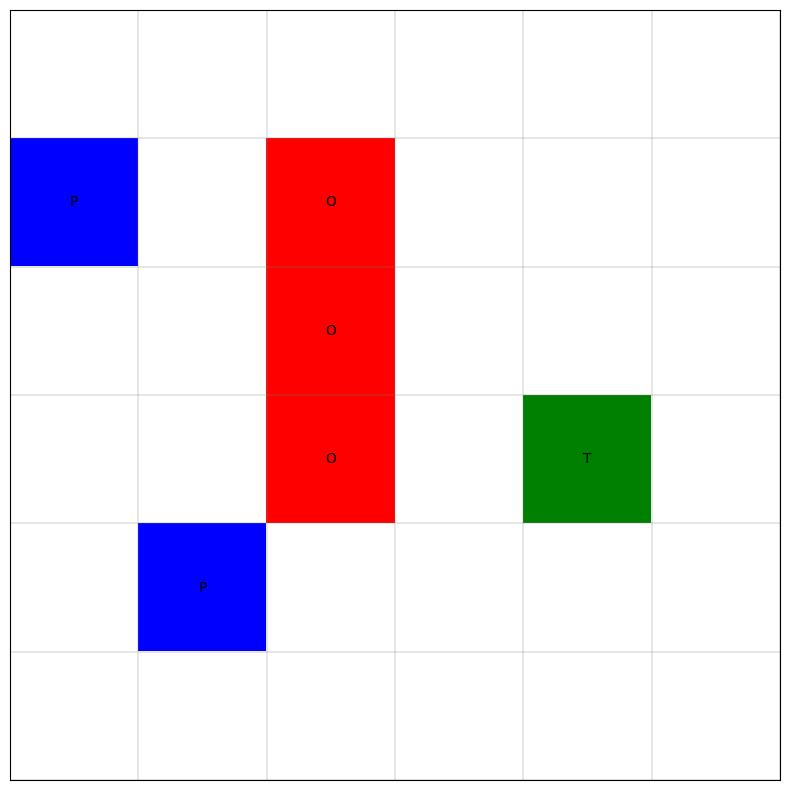

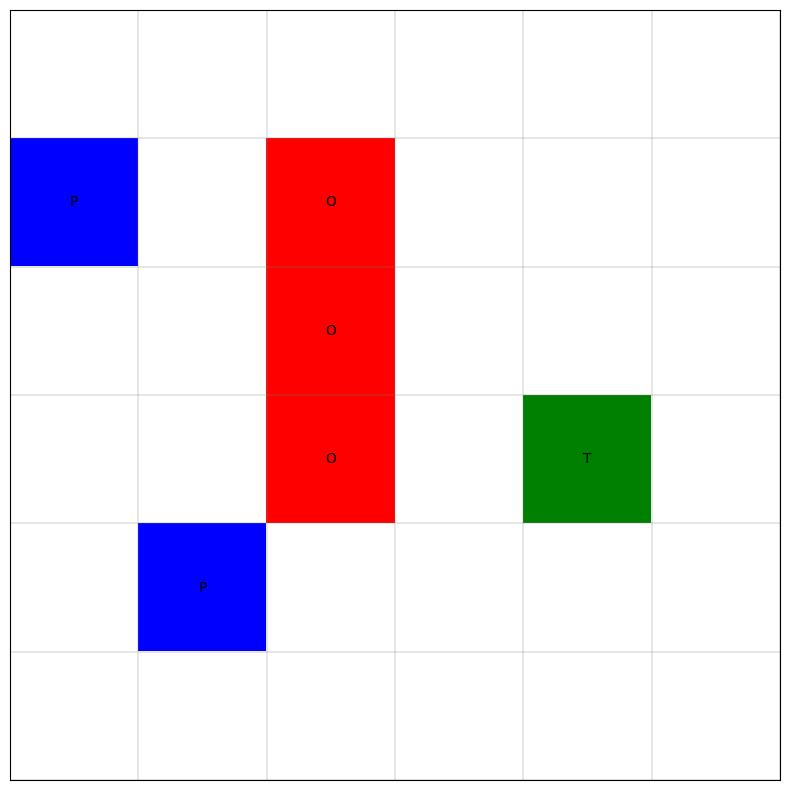

In [7]:
get_plot_states(scenario.states)

In [8]:
scenario.states

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 3., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [9]:
print(scenario.ped_coordinates_list)

[(1, 0), (4, 1)]


### 2. Move the pedestrian according to distance, avoid obstacles

In [10]:
automaton = Automaton(scenario)
simulation_scenario_states = automaton.simulation_multiple_steps()

Simulation stopped after 7 simulation steps, since the pedestrians have reached the target.
Having reached the preset maximum simulation steps.


In [11]:
simulation_scenario_states[0:-1] 

[array([[0., 0., 0., 0., 0., 0.],
        [1., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 3., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 3., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 1., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 3., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 1., 3., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 1., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0.],
        [0., 0., 2., 0., 3., 0.],
        [0., 0., 0., 0., 0., 0.],
      

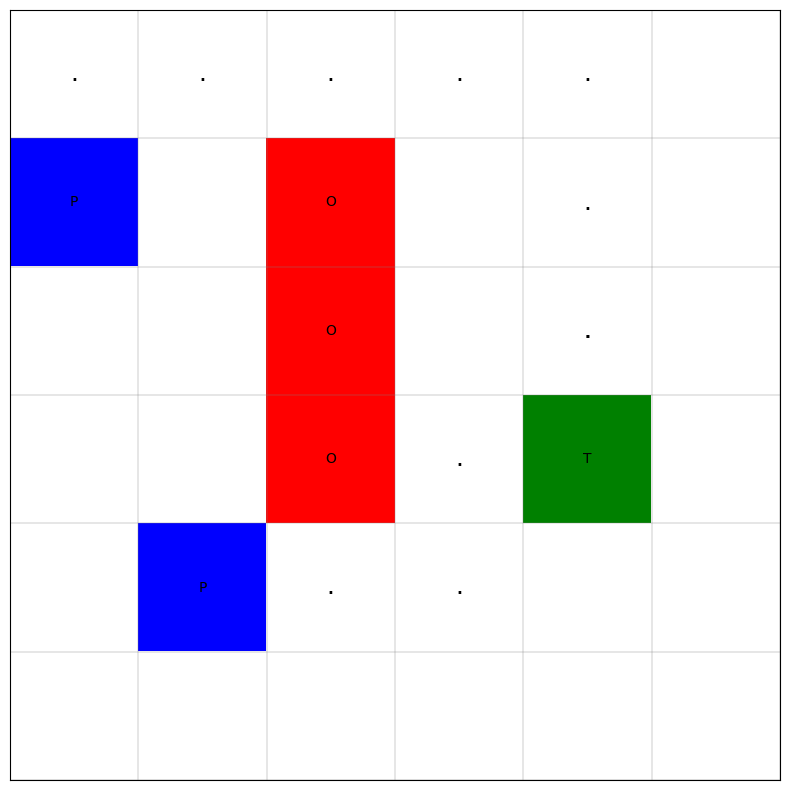

In [12]:
#%matplotlib notebook
ploted_states_basic = get_plot_all_simulation_states(simulation_scenario_states, scenario)
HTML(ploted_states_basic.to_jshtml())

In [13]:
ploted_states_basic.save('results/task1_basic_with_gui.gif')